
  # Project 2 - Ames Housing Data and Kaggle Challenge

In this last section of the project, i imported the cleaned data and perform various models on it. I used Linear, Lasso and Ridge regression on 3 different types of train sets; unscaled, scaled and automated feature selection. This allowed me to compare which model works best for which version of the train dataset. 

According to the results, Ridge performed relatively well on 3 experiments. One thing to note is that Linear regression performed very badly on scaled data. Therefore, i have decided to use Ridge Regression to contruct my final model as it produced the most accurate score out of the 3.

## Data Import
### Importing Relevant Libraries

In [1]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

#scikit 
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

#warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Datasets

In [2]:
sample_sr = pd.read_csv('./datasets/sample_sub_reg.csv')
test = pd.read_csv('./datasets/test_temp.csv')
train = pd.read_csv('./datasets/train_temp.csv')
df = pd.read_csv('./datasets/train_clean.csv')
dftest = pd.read_csv('./datasets/test_clean.csv')

In [3]:
df.head()

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,...,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Gr Liv Area,TotRms AbvGrd,Fireplaces,Wood Deck SF,Total Bath
0,0,0,1,0,1,0,0,0,0,0,...,79.6,13517,6,1976,2005,1479,6,0,0,2.5
1,0,0,1,0,1,0,0,0,0,0,...,43.0,11492,7,1996,1997,2122,8,1,0,3.5
2,0,0,1,0,1,0,0,1,0,0,...,68.0,7922,5,1953,2007,1057,5,0,0,2.0
3,0,0,1,0,1,0,0,1,0,0,...,73.0,9802,5,2006,2007,1444,7,0,100,2.5
4,0,0,1,0,1,0,0,0,0,0,...,82.0,14235,6,1900,1993,1445,6,0,0,2.0


In [4]:
dftest.head()

,MS Zoning_FV,MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Pave,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_HLS,Land Contour_Low,...,Lot Frontage,Lot Area,Overall Qual,Year Built,Year Remod/Add,Gr Liv Area,TotRms AbvGrd,Fireplaces,Wood Deck SF,Total Bath
0,0,0,0,1,1,0,0,1,0,0,...,69.0,9142,6,1910,1950,1928,9,0,0,2.0
1,0,0,1,0,1,0,0,0,0,0,...,69.9,9662,5,1977,1977,1967,10,0,170,2.0
2,0,0,1,0,1,0,0,0,0,0,...,58.0,17104,7,2006,2006,1496,7,1,100,3.5
3,0,0,0,1,1,0,0,1,0,0,...,60.0,8520,5,1923,2006,968,5,0,0,1.0
4,0,0,1,0,1,0,0,0,0,0,...,69.3,9500,6,1963,1963,1394,6,2,0,2.5


In [5]:
print(df.shape)
print(dftest.shape)
print(train.shape)
print(test.shape)

(2042, 123)
(874, 123)
(2042, 57)
(874, 56)


### Base Model

In [6]:
base_model = train["SalePrice"].mean()
base_model

181249.73653281096

### Model Prep: Create our features matrix (X) and target vector (y)

In [7]:
# Define X and y
X = df
y = train['SalePrice']
X_val = dftest

In [8]:
X.shape

(2042, 123)

In [9]:
train.shape

(2042, 57)

In [10]:
df.columns

Index(['MS Zoning_FV', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM',
       'Street_Pave', 'Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg',
       'Land Contour_HLS', 'Land Contour_Low',
       ...
       'Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Built',
       'Year Remod/Add', 'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces',
       'Wood Deck SF', 'Total Bath'],
      dtype='object', length=123)

### Model Prep: Train/Test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standard Scaler

In [12]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [13]:
X.shape, y.shape,X_test_scaled.shape

((2042, 123), (2042,), (409, 123))

### Automated Feature Selection

In [14]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

select = SelectFromModel(RandomForestRegressor(n_estimators=250, random_state=42))
select.fit(X_train, y_train)
X_train_ranfor = select.transform(X_train)
X_test_ranfor = select.transform(X_test)

### Model Prep: Instantiate our models

We'll be evaluating `LinearRegression`, `LassoCV` and `RidgeCV`, so we'll need to create instances of all three models.

In [15]:
lr = LinearRegression()

In [16]:
lasso = LassoCV(n_alphas=200)

In [17]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## (A) Running models Unscaled
We will first run the 3 models using the default X_train

### (1) Linear Regression

In [18]:
#Fit the model
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.9081204288413062

In [19]:
# predict on test set
pred_lr = lr.predict(X_test)
lr_r2_score = metrics.r2_score(y_test, pred_lr)
lr_r2_score

0.9009541160098244

Lin Reg Train Score: 0.9081204288413062
Lin Reg Test Score: 0.9009541160098244


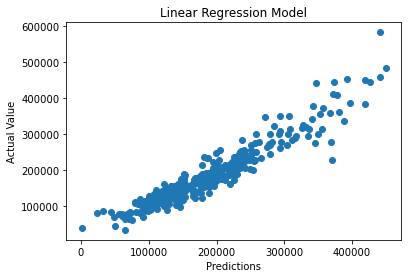

In [20]:
## LR model
plt.scatter(pred_lr, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Linear Regression Model')

print("Lin Reg Train Score:", lr.score(X_train, y_train))
print("Lin Reg Test Score:", lr.score(X_test, y_test))


### (2) Lasso Regression

In [21]:
# Set up a list of Lasso alphas to check.
lasso = LassoCV(n_alphas=200)
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train, y_train);

In [22]:
# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [23]:
# Predicting lasso on test set
pred_las = lasso_cv.predict(X_test)

Lasso Train Score: 0.9081107994555287
Lasso Test Score: 0.9011529575028208


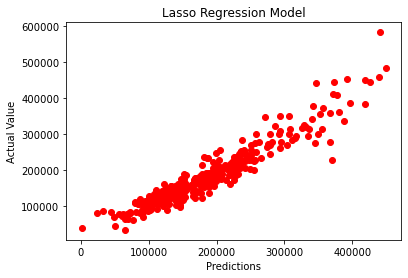

In [24]:
plt.scatter(pred_las, y_test, color='r')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Lasso Regression Model')

print("Lasso Train Score:", lasso_cv.score(X_train, y_train))
print("Lasso Test Score:", lasso_cv.score(X_test, y_test))

### (3) Ridge Regression

In [25]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train, y_train))
print(ridge_model.score(X_test, y_test))

0.9027524605955685
0.9012913236272994


In [26]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(X_train, y_train)

In [27]:
# Here is the optimal value of alpha
ridge_cv.alpha

10

In [28]:
# Predicting ridge on test set
pred_rid = ridge_cv.predict(X_test)

Ridge Train Score: 0.9027524605955685
Ridge Test Score: 0.9012913236272994


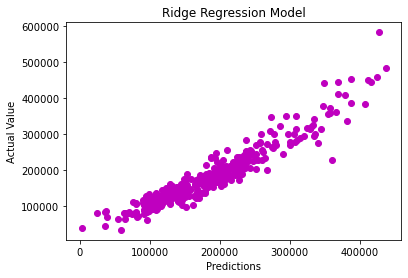

In [29]:
plt.scatter(pred_rid, y_test, color='m')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Ridge Regression Model')

print("Ridge Train Score:", ridge_cv.score(X_train, y_train))
print("Ridge Test Score:", ridge_cv.score(X_test, y_test))

### Running the Cross Validation

###  Linear Regression

In [30]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8781372677546266

###  Lasso Regression

In [31]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=3)
lasso_scores.mean()

0.7007730690836301

###  Ridge Regression

In [32]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8853995990447247

Ridge Regression seems to be doing well when using the default X_train. What if we use use the scaled X instead?

## (B) Running models with Standard Scaler

### (1) Linear Regression

In [33]:
#Fit the model
lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
lr.score(X_train_scaled, y_train)

# predict on test set
pred_lr = lr.predict(X_test_scaled)
lr_r2_score = metrics.r2_score(y_test, pred_lr)
lr_r2_score

-620505790081844.2

Lin Reg Train Score: 0.908120161387676
Lin Reg Test Score: -620505790081844.2


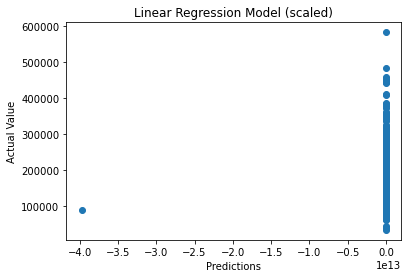

In [34]:
## LR model
plt.scatter(pred_lr, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Linear Regression Model (scaled)')

print("Lin Reg Train Score:", lr.score(X_train_scaled, y_train))
print("Lin Reg Test Score:", lr.score(X_test_scaled, y_test))

### (2) Lasso Regression

In [35]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_scaled, y_train);

# Here is the optimal value of alpha
lasso_cv.alpha_

1.0

In [36]:
# Predicting lasso on test set
pred_las = lasso_cv.predict(X_test_scaled)

Lasso Train Score: 0.9081199658424958
Lasso Test Score: 0.9009540624559982


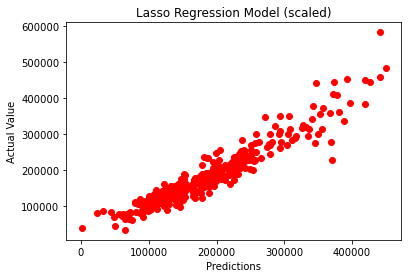

In [37]:
plt.scatter(pred_las, y_test, color='r')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Lasso Regression Model (scaled)')

print("Lasso Train Score:", lasso_cv.score(X_train_scaled, y_train))
print("Lasso Test Score:", lasso_cv.score(X_test_scaled, y_test))

### (3) Ridge Regression

In [38]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train_scaled, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train_scaled, y_train))
print(ridge_model.score(X_test_scaled, y_test))

0.9079608386800873
0.9010112379336477


In [39]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(X_train_scaled, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha

10

In [40]:
# Predicting ridge on test set
pred_rid = ridge_cv.predict(X_test_scaled)

Ridge Train Score: 0.9079608386800873
Ridge Test Score: 0.9010112379336477


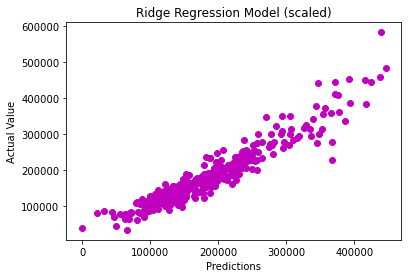

In [41]:
plt.scatter(pred_rid, y_test, color='m')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Ridge Regression Model (scaled)')

print("Ridge Train Score:", ridge_cv.score(X_train_scaled, y_train))
print("Ridge Test Score:", ridge_cv.score(X_test_scaled, y_test))

### Running the Cross Validation

In [42]:
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=3)
lr_scores.mean()

-2.559550170438532e+25

In [43]:
lasso_scores = cross_val_score(lasso, X_train_scaled, y_train, cv=3)
lasso_scores.mean()

0.8817313734495613

In [44]:
ridge_scores = cross_val_score(ridge, X_train_scaled, y_train, cv=3)
ridge_scores.mean()

0.8798958720332593

Lasso model performed the best with standard scaling. Lastly we are going to use an automated feature selection to predict the test set.

## (C) Using Automated Feature Selection

### (1) Linear Regression

In [45]:
#Fit the model
lr = LinearRegression()

lr.fit(X_train_ranfor, y_train)
lr.score(X_train_ranfor, y_train)

# predict on test set
pred_lr = lr.predict(X_test_ranfor)
lr_r2_score = metrics.r2_score(y_test, pred_lr)
lr_r2_score

0.8283277719855183

Lin Reg Train Score: 0.8075491626713365
Lin Reg Test Score: 0.8283277719855183


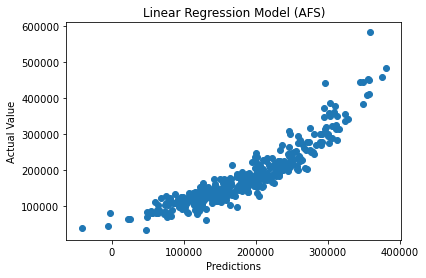

In [46]:
## LR model
plt.scatter(pred_lr, y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Linear Regression Model (AFS)')

print("Lin Reg Train Score:", lr.score(X_train_ranfor, y_train))
print("Lin Reg Test Score:", lr.score(X_test_ranfor, y_test))

### (2) Lasso Regression

In [47]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=50000)

# Fit model using best ridge alpha!
lasso_cv.fit(X_train_ranfor, y_train);

# Here is the optimal value of alpha
lasso_cv.alpha_

0.001

In [48]:
# Predicting lasso on test set
pred_las = lasso_cv.predict(X_test_ranfor)

Lasso Train Score: 0.8075491626713354
Lasso Test Score: 0.8283277707468075


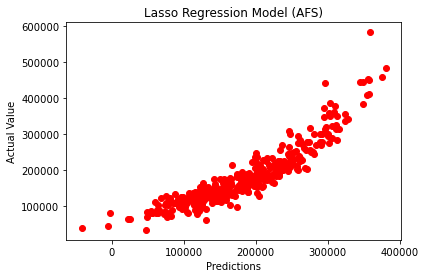

In [49]:
plt.scatter(pred_las, y_test, color='r')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Lasso Regression Model (AFS)')

print("Lasso Train Score:", lasso_cv.score(X_train_ranfor, y_train))
print("Lasso Test Score:", lasso_cv.score(X_test_ranfor, y_test))

### (3) Ridge Regression

In [50]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(X_train_ranfor, y_train)

# Evaluate model using R2.
print(ridge_model.score(X_train_ranfor, y_train))
print(ridge_model.score(X_test_ranfor, y_test))

0.8075438179019403
0.8282875509014245


In [51]:
# Set up a list of ridge alphas to check.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv = ridge_model.fit(X_train_ranfor, y_train)

# Here is the optimal value of alpha
ridge_cv.alpha

10

In [52]:
# Predicting ridge on test set
pred_rid = ridge_cv.predict(X_test_ranfor)

Ridge Train Score: 0.8075438179019403
Ridge Test Score: 0.8282875509014245


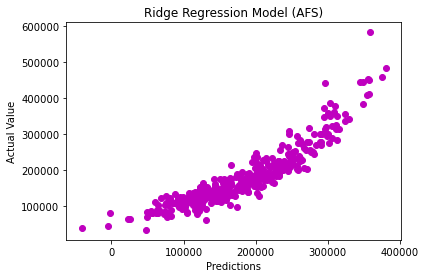

In [53]:
plt.scatter(pred_rid, y_test, color='m')
plt.xlabel("Predictions")
plt.ylabel("Actual Value")
plt.title('Ridge Regression Model (AFS)')

print("Ridge Train Score:", ridge_cv.score(X_train_ranfor, y_train))
print("Ridge Test Score:", ridge_cv.score(X_test_ranfor, y_test))

### Running the Cross Validation

In [54]:
lr_scores = cross_val_score(lr, X_train_ranfor, y_train, cv=3)
lr_scores.mean()

0.8026015735608558

In [55]:
lasso_scores = cross_val_score(lasso, X_train_ranfor, y_train, cv=3)
lasso_scores.mean()

0.6963547248287428

In [56]:
ridge_scores = cross_val_score(ridge, X_train_ranfor, y_train, cv=3)
ridge_scores.mean()

0.8026120790909581

There we go! Based on the 3 types of comparison used, Ridge regression has the best accuracy. Hence we shall proceed to evaluate Ridge regression.

## Evaluating the Best Model
---

`RidgeCV` seems to be doing the best, so let's move forward with that model. Fit the model to the training data, and evaluate the training and test scores below.

In [57]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [58]:
ridge_cv.coef_

array([1.75234199e+02, 2.00907164e+00, 2.42494934e+04, 3.48988999e+02,
       3.23963082e+02, 4.60476859e+01, 8.54357466e+03, 5.80199398e+03])

In [59]:
ridge_cv.intercept_

-1416337.9753766991

In [60]:
ridge_scores.mean()

0.8026120790909581

In [61]:
pred = ridge.predict(X_test)

In [62]:
r2_score(y_test, pred)

0.9026714792189777

<AxesSubplot:title={'center':'Modal Coefficients'}>

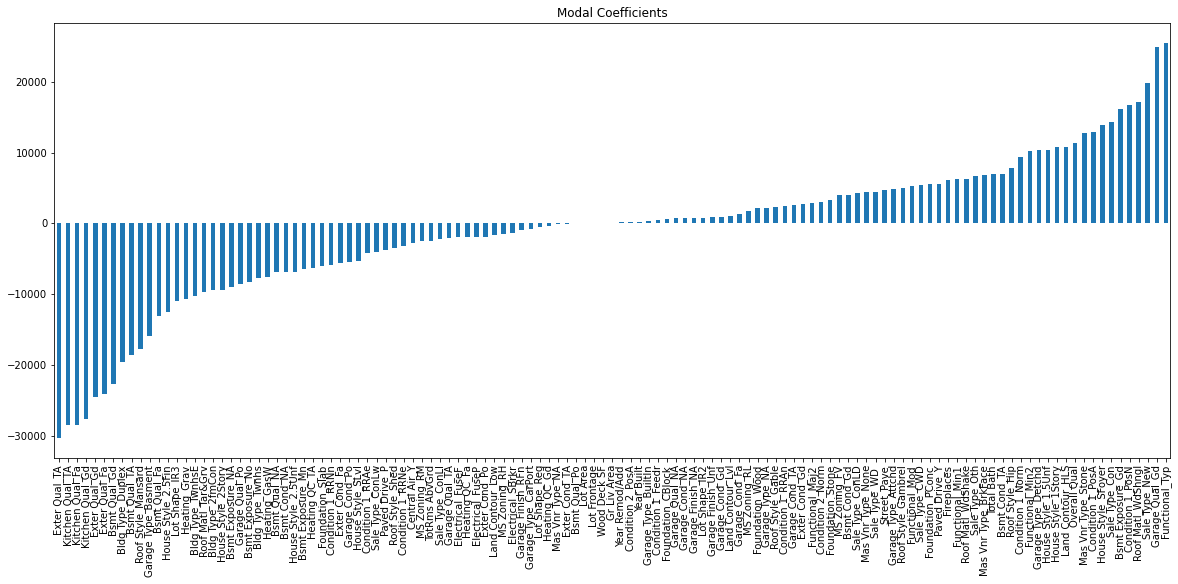

In [63]:
predictors = [col for col in df._get_numeric_data().columns if col != 'SalePrice']
plt.xticks(rotation=45)

coef = pd.Series(ridge.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Modal Coefficients', figsize=(20, 8))

### Residuals

In [64]:
residuals = y_test - pred

Text(0.5, 1.0, 'Residuals Dist')

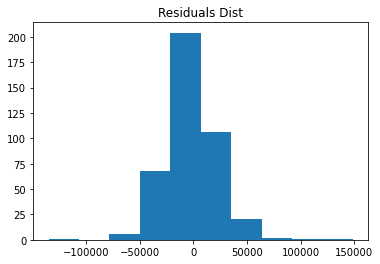

In [65]:
plt.hist(residuals)
plt.title('Residuals Dist')

### Normalise Distribution (Applying log)

Text(0.5, 1.0, 'Residuals (Log)')

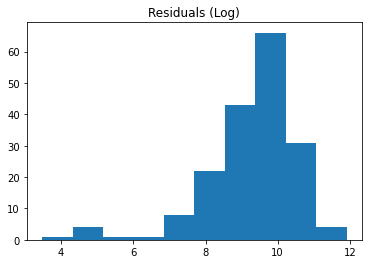

In [66]:
plt.hist(np.log(residuals))
plt.title('Residuals (Log)')

### Comparing Predictions with residuals

Text(0.5, 1.0, 'Ridge Regression Model')

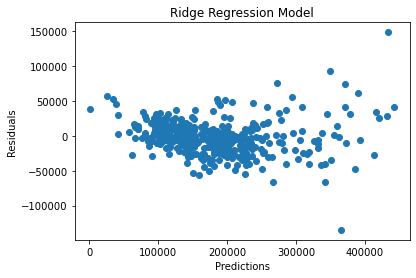

In [67]:
plt.scatter(pred, residuals)
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.title('Ridge Regression Model')

## Sale Price Prediction for Train with Ridge Regression

In [68]:
pred_rid

array([301202.24145403, 300562.1179599 , 232340.47487886, 197853.75764743,
       226170.38092186, 249790.64158742, 251472.2859054 , 356759.1145156 ,
       199649.57860943,  96523.74404659, 188631.20287571, 131959.47464141,
        54470.89536168, 199760.56544963, 246663.14352269, 228931.65998329,
       305357.00956913,  66523.81685318, 113182.63810166, 181133.75697484,
       142046.33539049, 197359.91230105,  99740.76405746, 267798.35425797,
       200853.69949432, 232585.86818328, 217605.95877609, 116482.91986235,
       148394.04405299, 197903.17191615, 291365.46496335, 107994.25752254,
       189207.6626249 , 129716.54506976, 144417.93496246, 128213.47556186,
       118567.83036583, 125373.83387929,  88371.42648834, 155221.79428262,
       202390.04538568, 147795.86429123, 129216.83715251, 230922.43097834,
       173934.70630065, 303435.95864193, 252471.13507508, 114989.28397338,
       142805.34167801, 111798.80217955,  81933.76116642, 134483.71997144,
       187209.31410925, 1

## Interpretation of Final Model

Ridge Regression penalizes the model if the removed predictors are seen as setting their coefficent to 0. Hence, it enforces the removed predictors to be of slight significance in a continous way. This reduces the complexity of the model while holding on the the variables.

The 2 visualizations above shows the (1) coefficients of variables and the (2) relationship between residuals and predictions. For example, if a garage quality as deemed as good (second highest coefficient), for every unit increase in the garage quality, it will in turn increase the price of the house by about ~25k, subject to other variables being constant.

Also, with an intercept of -1416337.98, the price of the home (Y) will be around -1.4million should all variables (X) be  = 0. However, it is not logical. I will further research on this matter as my future work.

## Conclusion

After testing various models, the most successful model in predicting home prices would be the ridge regression model. Meanwhile, the analysis also paints a clearer view of the variables important in affecting the prices. Quality variables are the most important, followed by size of the home  and the location it is built in. By taking these 3 important points into consideration, future homeowners could use them to help them find the most suitable home within their budget by predicting the sale price.

Going forward, I would like to dive deeper into exploring more variables and combinations to get more accurate models and weighing different variables to see if the effect on the various models would be significant. I would also like to use more models to experiment with the dataset.